In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
model_4layer_512_256_256_256 = tf.keras.models.load_model('saved_models/Model_ANN_Init')
model_3layer_512_256_256 = tf.keras.models.load_model('saved_models/Model_ANN_3hid_512_256_256')
model_2layer_512_256 = tf.keras.models.load_model('saved_models/Model_ANN_2hid512_256')
model_2layer_512_512 = tf.keras.models.load_model('saved_models/Model_ANN_2hid512_512')
model_2layer_1024_256 = tf.keras.models.load_model('saved_models/Model_ANN_2hid1024_256')
model_1layer_512 = tf.keras.models.load_model('saved_models/Model_ANN_1hid512')
model_1layer_256 = tf.keras.models.load_model('saved_models/Model_ANN_1hid256')
model_1layer_1024 = tf.keras.models.load_model('saved_models/Model_ANN_1hid1024')
model_1layer_2048 = tf.keras.models.load_model('saved_models/Model_ANN_1hid2048')

In [12]:
scores_4layer_512_256_256_256 = model_4layer_512_256_256_256.evaluate(x_test, y_test, verbose=2)
#print('Test loss:', scores[0])
#print('Test accuracy:', scores[1]*100)
scores_3layer_512_256_256 = model_3layer_512_256_256.evaluate(x_test, y_test, verbose=2)
scores_2layer_512_256 = model_2layer_512_256.evaluate(x_test, y_test, verbose=2)
scores_2layer_512_512 = model_2layer_512_512.evaluate(x_test, y_test, verbose=2)
scores_2layer_1024_256 = model_2layer_1024_256.evaluate(x_test, y_test, verbose=2)
scores_1layer_512 = model_1layer_512.evaluate(x_test, y_test, verbose=2)
scores_1layer_256 = model_1layer_256.evaluate(x_test, y_test, verbose=2)
scores_1layer_1024 = model_1layer_1024.evaluate(x_test, y_test, verbose=2)
scores_1layer_2048 = model_1layer_2048.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 1.6175 - accuracy: 0.4282
10000/10000 - 1s - loss: 1.6262 - accuracy: 0.4288
10000/10000 - 1s - loss: 1.5344 - accuracy: 0.4430
10000/10000 - 1s - loss: 1.6118 - accuracy: 0.4282
10000/10000 - 2s - loss: 1.5231 - accuracy: 0.4617
10000/10000 - 1s - loss: 1.5361 - accuracy: 0.4498
10000/10000 - 1s - loss: 1.6325 - accuracy: 0.4203
10000/10000 - 2s - loss: 1.4916 - accuracy: 0.4668
10000/10000 - 3s - loss: 1.5275 - accuracy: 0.4540


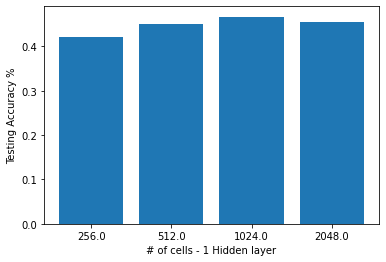

In [35]:
accuracy_1layer = [[256, scores_1layer_256[1]], [512, scores_1layer_512[1]], [1024, scores_1layer_1024[1]], [2048, scores_1layer_2048[1]]]
accuracy_1layer = np.array(accuracy_1layer)
x = range(len(accuracy_1layer[:,0]))
plt.bar(x, accuracy_1layer[:,1])
plt.xticks(x, accuracy_1layer[:,0])
plt.xlabel('# of cells - 1 Hidden layer')
plt.ylabel('Testing Accuracy %')
plt.show()

For 1 Hidden layer, 1024 of cells would be the best configuration with highest testing accuracy

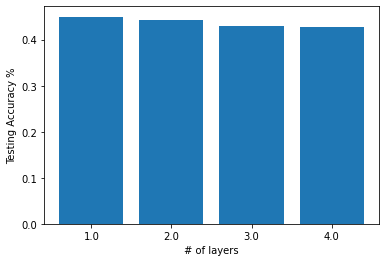

In [36]:
accuracy_layer = [[1, scores_1layer_512[1]], [2, scores_2layer_512_256[1]], [3, scores_3layer_512_256_256[1]], [4, scores_4layer_512_256_256_256[1]]]
accuracy_layer = np.array(accuracy_layer)
x = range(len(accuracy_layer[:,0]))
plt.bar(x, accuracy_layer[:,1])
plt.xticks(x, accuracy_layer[:,0])
plt.xlabel('# of layers')
plt.ylabel('Testing Accuracy %')
plt.show()

For Different layers arrangement, We fould find that 1 layer would reach the highest testing accuracy. 
The network becomes bad when the network becomes more complex (i.e., adding too much layers).

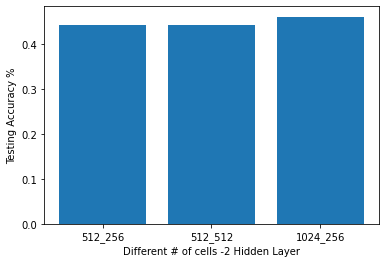

In [43]:
accuracy_2layer = [[0, scores_2layer_512_256[1]], [1, scores_2layer_512_256[1]], [2, scores_2layer_1024_256[1]]]
accuracy_2layer = np.array(accuracy_2layer)
x_label = ["512_256", "512_512", "1024_256"]
x = range(len(x_label))
#x = range(len(accuracy_2layer[:,0]))
plt.bar(x, accuracy_2layer[:,1])
plt.xticks(x, x_label)
plt.xlabel('Different # of cells -2 Hidden Layer')
plt.ylabel('Testing Accuracy %')
plt.show()